<a href="https://colab.research.google.com/github/tselane2110/Forecasting-Sticker-Sales/blob/main/StickerSalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s5e1_path = kagglehub.competition_download('playground-series-s5e1')

print('Data source import complete.')


100%|██████████| 2.26M/2.26M [00:00<00:00, 88.0MB/s]

Extracting files...
Data source import complete.


In [3]:
print(playground_series_s5e1_path)

/root/.cache/kagglehub/competitions/playground-series-s5e1


## 1. Importing required libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# getting the path to the files

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/competitions/playground-series-s5e1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/root/.cache/kagglehub/competitions/playground-series-s5e1/train.csv
/root/.cache/kagglehub/competitions/playground-series-s5e1/sample_submission.csv
/root/.cache/kagglehub/competitions/playground-series-s5e1/test.csv


## 2. Importing Dataset

In [81]:
df = pd.read_csv("/root/.cache/kagglehub/competitions/playground-series-s5e1/train.csv")
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


## 3. Understanding Data

In [82]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [83]:
df.dtypes

,0
id,int64
date,object
country,object
store,object
product,object
num_sold,float64


In [84]:
df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [85]:
221259/230130

0.9614522226567592

In [86]:
len(df['date'].unique())

2557

In [87]:
2557/365

7.005479452054795

In [88]:
df['country'].unique()

array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
      dtype=object)

In [89]:
df['product'].unique()

array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
       'Kerneler Dark Mode'], dtype=object)

In [90]:
df['store'].unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [91]:
len(df['num_sold'].unique())

4038

## 3.1 Understanding Data (Summary)

Our data has 6 columns (id, date, country, product, store, num_sold). We realized that:
1. The `id` column is not required, hence, we will delete it during the **data-cleaning** phase.
2. The <u>datatype</u> of the `date` column is "object" which we will change it to "datetime" during the **data-cleaning** phase.

### About `date`:
We checked the total **unique** values in our date column which turned out to be 2557. Assuming that every-year has 365 days, we divided 2557 by 365 and got 7.005 as an answer. This means that we have about around 7 years of data. However, we will still have to fact-check by understanding our data more during the **data-cleaning** phase.

### About the Variance in the data:
Since the target-column is `num_sold`, we checked the **mean** and **standard-deviation** of this column to understand the distribution of the data. The mean we got is 752.527 whereas the standard-deviation (std) is around 690.165. The minimum value in the `num_sold` is 5 whereas the maximum is 5939. This might mean that our data has high-variance (not too high but still high) and there might be some outliers (some stores might be selling some products more than the other stores) which we will further explore in the **data-cleaning** phase.

### About missing values
We saw that the total number of rows in the dataset are 230130 whereas the total number of "present values" in the `num_sold` column is 221259. This implies that (for `num_sold` column) 4% of the data is missing. However, we will further explore the missing values of all columns in the **data-cleaning** phase.

## 4. Data Cleaning

In [92]:
# fixing the datatype of the 'date' column
df['date'] = pd.to_datetime(df['date'])

In [93]:
df.dtypes

,0
id,int64
date,datetime64[ns]
country,object
store,object
product,object
num_sold,float64


In [94]:
df['date'][0]

Timestamp('2010-01-01 00:00:00')

In [95]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [96]:
# looking for the count of missing values in each column
date = df['date'].isna().sum()
country = df['country'].isna().sum()
store = df['store'].isna().sum()
product = df['product'].isna().sum()
sales = df['num_sold'].isna().sum()

print(f"""Missing Values for all columns are:\n
          For date column: {date}\n
          For country column: {country}\n
          For store column: {store}\n
          For product column: {product}\n
          For num_sold column: {sales}""")

Missing Values for all columns are:

          For date column: 0

          For country column: 0

          For store column: 0

          For product column: 0

          For num_sold column: 8871


In [97]:
len(df['num_sold'])

230130

In [98]:
len(df['num_sold'][df['country'] == "Kenya"])

38355

In [99]:
len(df["num_sold"][(df["country"] == "Kenya") & (df["num_sold"].isna())])

4625

In [100]:
4625/38355

0.12058401772910964

In [101]:
len(df['num_sold'][df['country'] == "Canada"])

38355

In [102]:
len(df['num_sold'][(df['country'] == "Canada") & (df['num_sold'].isna())])

4246

In [103]:
4246/38355

0.11070264633033502

In [104]:
df = df.dropna(subset=["num_sold"])
print(df.isna().sum())

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


In [105]:
df

,id,date,country,store,product,num_sold
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [106]:
# looking for duplicate rows
print(f"We have {df.duplicated().sum()} duplicate rows in our dataset.")

We have 0 duplicate rows in our dataset.


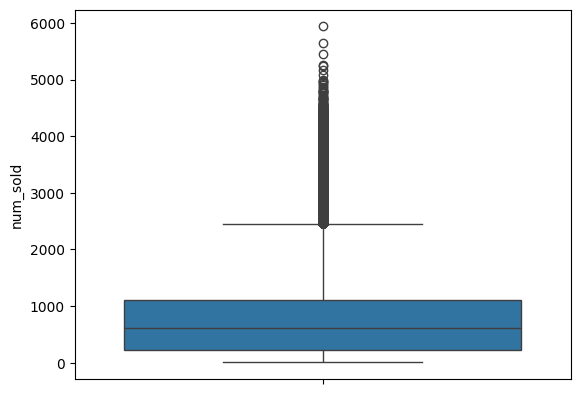

In [107]:
# looking for outliers

sns.boxplot(data=df, y="num_sold")
plt.show()

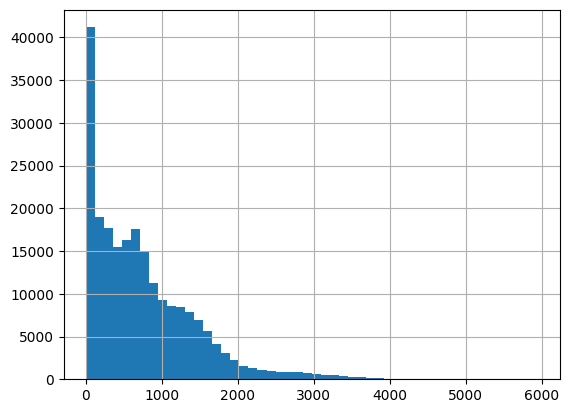

In [108]:
df["num_sold"].hist(bins=50)
plt.show()

<Axes: xlabel='date'>

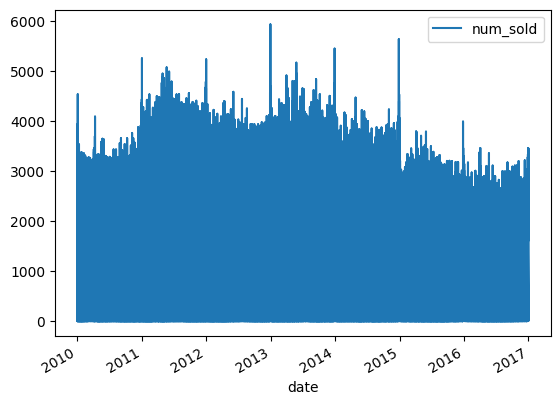

In [121]:
df.plot.line(x = 'date', y = 'num_sold')

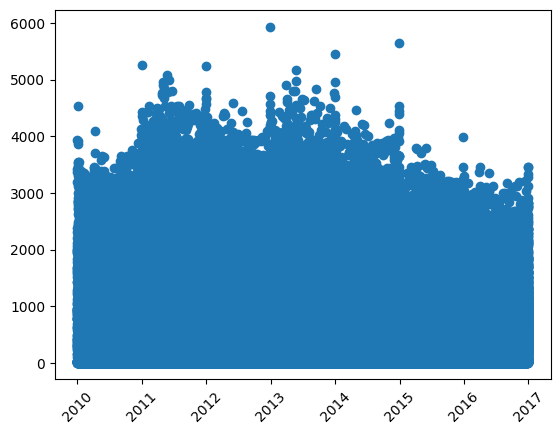

In [111]:
plt.scatter(df["date"], df["num_sold"])
plt.xticks(rotation=45)
plt.show()

In [122]:
df["z_score"] = stats.zscore(df["num_sold"])
outliers = df[df["z_score"].abs() > 3]
outliers

,id,date,country,store,product,num_sold,z_score
66,66,2010-01-01,Norway,Stickers for Less,Kaggle,3369.0,3.791089
67,67,2010-01-01,Norway,Stickers for Less,Kaggle Tiers,3195.0,3.538975
71,71,2010-01-01,Norway,Premium Sticker Mart,Kaggle,3940.0,4.618429
72,72,2010-01-01,Norway,Premium Sticker Mart,Kaggle Tiers,3430.0,3.879474
156,156,2010-01-02,Norway,Stickers for Less,Kaggle,3545.0,4.046101
...,...,...,...,...,...,...,...
229946,229946,2016-12-29,Singapore,Premium Sticker Mart,Kaggle,2833.0,3.014462
230016,230016,2016-12-30,Norway,Stickers for Less,Kaggle,3127.0,3.440448
230021,230021,2016-12-30,Norway,Premium Sticker Mart,Kaggle,3465.0,3.930186
230111,230111,2016-12-31,Norway,Premium Sticker Mart,Kaggle,3459.0,3.921493


In [123]:
outliers.z_score.describe()

,z_score
count,3938.000000
mean,3.675013
std,0.572917
min,3.001421
25%,3.231801
50%,3.536077
75%,3.967496
max,7.514842


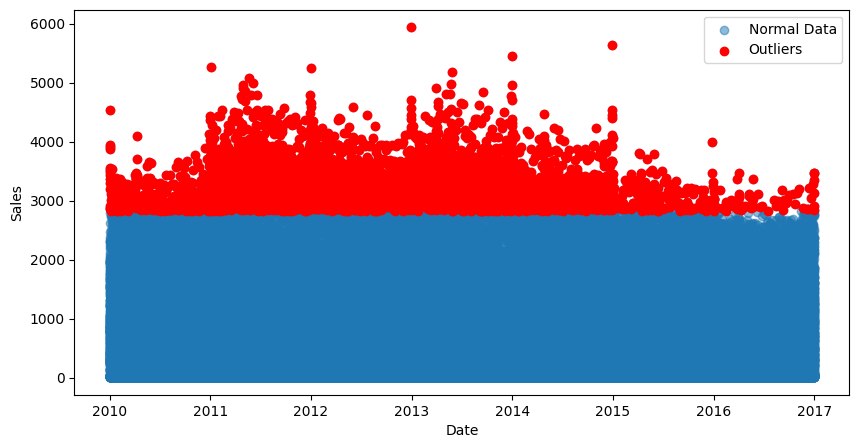

In [125]:
plt.figure(figsize=(10, 5))
plt.scatter(df["date"], df["num_sold"], label="Normal Data", alpha=0.5)
plt.scatter(outliers["date"], outliers["num_sold"], color="red", label="Outliers")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [132]:
df_new = df
df_new = df.dropna('num_sold')
df_new

,id,country,store,product,num_sold,z_score
date,,,,,,
2010-01-01,1,Canada,Discount Stickers,Kaggle,973.0,0.319450
2010-01-01,2,Canada,Discount Stickers,Kaggle Tiers,906.0,0.222371
2010-01-01,3,Canada,Discount Stickers,Kerneler,423.0,-0.477463
2010-01-01,4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,-0.378935
2010-01-01,5,Canada,Stickers for Less,Holographic Goose,300.0,-0.655681
...,...,...,...,...,...,...
2016-12-31,230125,Singapore,Premium Sticker Mart,Holographic Goose,466.0,-0.415158
2016-12-31,230126,Singapore,Premium Sticker Mart,Kaggle,2907.0,3.121683
2016-12-31,230127,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2.240732


<Axes: xlabel='date'>

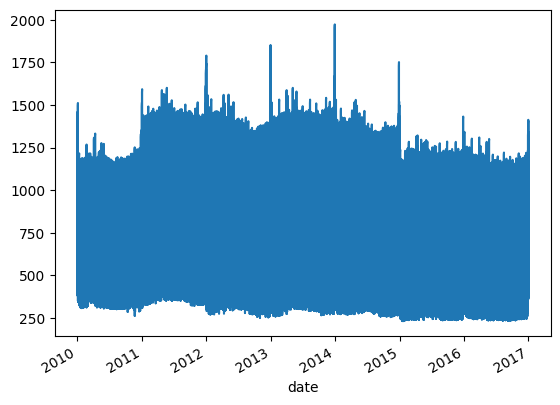

In [133]:
df_new['num_sold'].rolling(window=30).mean().plot()

In [112]:
Q1 = df["num_sold"].quantile(0.25)
Q3 = df["num_sold"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["num_sold"] < lower_bound) | (df["num_sold"] > upper_bound)]
print(outliers.isna().sum())

id          0
date        0
country     0
store       0
product     0
num_sold    0
z_score     0
dtype: int64
6630
